因爬取时间长，以两页为例

In [7]:
import requests
from lxml import etree
import csv
import numpy
import codecs
import sys
def down(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (compatible; WOW64; MSIE 10.0; Windows NT 6.2)',
    }
    response = requests.get(url,headers=headers)
    html = response.content
    return html

if __name__ =='__main__':
    with open('test_launch4.csv', 'a', encoding='utf-8', newline='')as f:
        csv_write = csv.writer(f, dialect='excel')
        csv_write.writerow(['总价','单价',  '小区名字',  '区域',  '户型',  '建筑面积',  '朝向',  '装修',  '楼层'])
    for page in range(1,2):
        if page == 1:
            url = 'https://sh.lianjia.com/ershoufang/'
        else:
            url ='https://sh.lianjia.com/ershoufang/pg'+str(page)+'/'
        print('url:'+url)
        html = down(url)
        html = etree.HTML(html)
        #print(html.decode('utf-8'))
        ls = html.xpath('//li[@class="clear LOGVIEWDATA LOGCLICKDATA"]//div[@class="title"]/a')
        print('len:',len(ls))
        for each in ls:
            link = each.xpath('./@href')[0]
            print('link:',link)
            detail_html = down(link)
            detail_html = etree.HTML(detail_html)
            title = detail_html.xpath('//h1[@class="main"]/text()')[0]
            print('title:',title)
            total_price = detail_html.xpath('//div[@class="price "]/span[@class="total"]/text()')[0]
            #总价print('total_price',total_price)
            total_unit = detail_html.xpath('//div[@class="price "]/span[@class="unit"]//text()')[0]
            #单位print('total unit:',total_unit)
            price = detail_html.xpath('//span[@class="unitPriceValue"]/text()')[0]
            #单价print('price:',price)
            unit = detail_html.xpath('//span[@class="unitPriceValue"]/i/text()')[0]
            #单位print('unit:',unit)
            community_name = detail_html.xpath('//div[@class="communityName"]/a[@class="info "]/text()')[0]
            #小区名字print('community name:',community_name)
            area = detail_html.xpath('//div[@class="areaName"]/span[@class="info"]//text()')
            area = ''.join(area)
            #区域print('area:',area)

            bases = detail_html.xpath('//div[@class="base"]/div[@class="content"]//li')
            print('bases len:',len(bases))
            room_type = bases[0].xpath('./text()')[0]
            #户型print('room type:',room_type)
            floor = bases[1].xpath('./text()')[0]
            #楼层print('floor:', floor)
            build_area = bases[2].xpath('./text()')[0]
            #建筑面积print('build_area:', build_area)
            room_struct = bases[3].xpath('./text()')[0]
            print('room_struct:', room_struct)
            within_area = bases[4].xpath('./text()')[0]
            print('within_area:', within_area)
            building_type = bases[5].xpath('./text()')[0]
            print('building_type:', building_type)
            room_dir = bases[6].xpath('./text()')[0]
            #朝向 print('room_dir:', room_dir)
            build_struct = bases[7].xpath('./text()')[0]
            print('build_struct:', build_struct)
            if(8<len(bases)):
                decrator = bases[8].xpath('./text()')[0]
            else:
                decrator=numpy.nan
            #print('decrator:', decrator)
            if (9 < len(bases)):
                elvator = bases[9].xpath('./text()')[0]
            else:
                elvator=numpy.nan
                print('elvator:', elvator)
            if (10 < len(bases)):
                has_elvator = bases[10].xpath('./text()')[0]
            else:
                has_elvator=numpy.nan
                print('has_elvator:', has_elvator)
            print('='*600)
            #f=open('./house.csv','w')
            stu1=[total_price+total_unit,price+unit,community_name,area[0:2],room_type,build_area,room_dir,decrator,floor[0:3]]
            with open('houseCrawling10.csv', 'a', encoding='utf-8', newline='')as f:
                csv_write = csv.writer(f, dialect='excel')
                csv_write.writerow(stu1)



url:https://sh.lianjia.com/ershoufang/
len: 30
link: https://sh.lianjia.com/ershoufang/107103493968.html
title: 1号线+满5唯1新装修+拎包住，好停车+全明户型，含家电
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 砖混结构
link: https://sh.lianjia.com/ershoufang/107103498478.html
title: 烫金三楼 小户型 总价低 有钥匙
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 砖混结构
link: https://sh.lianjia.com/ershoufang/107103493184.html
title: 新城自贸区 户型方正两房 临靠龙湖天街 生活便利
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103483189.html
title: 陆家嘴黄浦江畔+京城大厦精装2房+交通便利
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103518386.html
title: 万科新上双南电梯两房+带双阳台+楼层佳视野开阔
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103427485.html
title: 晨光公寓 3室1厅 南
bases len

title: 海华小区 2室1厅 南
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 塔楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103503118.html
title: 售后公房满五唯一 13号+14号+大虹桥
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 砖混结构
link: https://sh.lianjia.com/ershoufang/107103511173.html
title: 店长推荐 万科4期电梯大3房 业主诚意出售 满五唯一
bases len: 11
room_struct: 平层
within_area: 134.46㎡
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103504953.html
title: 临港自贸区高品质小区，乾耀东港精装修三房诚意出售
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103516512.html
title: 象屿都城 2室1厅 南
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103433999.html
title: 上海绿城 4室3厅 南 北
bases len: 11
room_struct: 复式
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/1071

title: 全南两房 楼层好 视野开阔 成熟社区 适合居住
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103471981.html
title: 低总价大三房+精装修拎包入住+法三+key方便看房
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103484097.html
title: 临港自贸区主城区 精装保养 可拎包入住 满五税少
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103487945.html
title: 近新村路地铁站 满五唯一 房龄新 一梯两户 全明户型
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 砖混结构
link: https://sh.lianjia.com/ershoufang/107103511209.html
title: 经纬二期双南精装两房 中高楼层位置佳 诚意出售
bases len: 11
room_struct: 平层
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: https://sh.lianjia.com/ershoufang/107103498753.html
title: 看房有钥匙 诚意出售 给您一个温暖而又舒适的家
bases len: 11
room_struct: 复式
within_area: 暂无数据
building_type: 板楼
build_struct: 钢混结构
link: ht

In [2]:
import pandas as pd  # 导入数据统计模块
from sklearn.svm import LinearSVR  # 导入回归函数
#解决数据输出时列名不对齐的问题
pd.set_option('display.unicode.east_asian_width', True)
data = pd.read_csv('houseCrawling8.csv',header=0,names=['总价','单价',  '小区名字',  '区域',  '户型',  '建筑面积',  '朝向',  '装修',  '楼层'])  # 读取csv数据文件
print(data.head())
 # 将索引列删除
data.dropna(axis=0, how='any', inplace=True)  # 删除data数据中的所有空值
data['单价'] = data['单价'].map(lambda d: d.replace('元/平米', ''))  # 将单价“元/平米”去掉
data['单价'] = data['单价'].astype(float)  # 将房子单价转换为浮点类型
data['总价'] = data['总价'].map(lambda z: z.replace('万', ''))  # 将总价“万”去掉
data['总价'] = data['总价'].astype(float)  # 将房子总价转换为浮点类型
data['建筑面积'] = data['建筑面积'].map(lambda p: p.replace('㎡', ''))  # 将建筑面价“平米”去掉
data['建筑面积'] = data['建筑面积'].astype(float)  # 将建筑面积转换为浮点类型
print(data.head())

# 获取各区二手房均价分析
def get_average_price():
    group = data.groupby('区域')  # 将房子区域分组
    average_price_group = group['单价'].mean()  # 计算每个区域的均价
    region = average_price_group.index  # 区域
    average_price = average_price_group.values.astype(int) # 区域对应的均价
    return region, average_price  # 返回区域与对应的均价


# 获取各区房子数量比例
def get_house_number():
    group_number = data.groupby('区域').size()  # 房子区域分组数量
    region = group_number.index  # 区域
    numbers = group_number.values  # 获取每个区域内房子出售的数量
    percentage = numbers / numbers.sum() * 100  # 计算每个区域房子数量的百分比
    return region, percentage  # 返回百分比


# 获取全市二手房装修程度对比
def get_renovation():
    group_renovation = data.groupby('装修').size()  # 将房子装修程度分组并统计数量
    type = group_renovation.index     # 装修程度
    number = group_renovation.values  # 装修程度对应的数量
    return type, number  # 返回装修程度与对应的数量


# 获取二手房热门户型均价
def get_house_type():
    house_type_number = data.groupby('户型').size()  # 房子户型分组数量
    sort_values = house_type_number.sort_values(ascending=False)  # 将户型分组数量进行降序
    top_five = sort_values.head(5)  # 提取前5组户型数据
    house_type_mean = data.groupby('户型')['单价'].mean()  # 计算每个户型的均价
    type = house_type_mean[top_five.index].index           # 户型
    price = house_type_mean[top_five.index].values        # 户型对应的均价
    return type, price.astype(int)  # 返回户型与对应的数量


# 获取价格预测
def get_price_forecast():
    data_copy = data.copy()      # 拷贝数据
    print(data_copy[['户型', '建筑面积']].head())
    data_copy[['室', '厅','厨', '卫']] = data_copy['户型'].str.extract('(\d+)室(\d+)厅(\d+)厨(\d+)卫')
    data_copy['室'] = data_copy['室'].astype(float)  # 将房子室转换为浮点类型
    data_copy['厅'] = data_copy['厅'].astype(float)
    data_copy['厨'] = data_copy['厨'].astype(float)# 将房子厅转换为浮点类型
    data_copy['卫'] = data_copy['卫'].astype(float)  # 将房子卫转换为浮点类型
    print(data_copy[['室','厅','厨','卫']].head())        # 打印“室”、“厅”、“卫”数据

    del data_copy['小区名字']
    del data_copy['户型']
    del data_copy['朝向']
    del data_copy['楼层']
    del data_copy['装修']
    del data_copy['区域']
    del data_copy['单价']
    data_copy.dropna(axis=0, how='any', inplace=True)  # 删除data数据中的所有空值
    # 获取“建筑面积”小于300平米的房子信息
    new_data = data_copy[data_copy['建筑面积'] < 300].reset_index(drop=True)
    print(new_data.head())                                  # 打印处理后的头部信息

    #  添加自定义预测数据
    new_data.loc[2944] = [None, 88.0, 2.0, 1.0,1.0, 1.0]
    new_data.loc[2945] = [None, 136.0, 3.0, 2.0,1.0, 2.0]
    data_train=new_data.loc[0:2943]
    x_list = ['建筑面积',  '室', '厅', '厨','卫']    # 自变量参考列
    data_mean = data_train.mean()               # 获取平均值
    data_std = data_train.std()                 # 获取标准偏差
    data_train = (data_train - data_mean) / data_std  # 数据标准化
    x_train = data_train[x_list].values  # 特征数据
    y_train = data_train['总价'].values  # 目标数据，总价
    linearsvr = LinearSVR(C=0.1)  # 创建LinearSVR()对象
    linearsvr.fit(x_train, y_train)      # 训练模型
    x = ((new_data[x_list] - data_mean[x_list]) / data_std[x_list]).values  # 标准化特征数据
    new_data[u'y_pred'] = linearsvr.predict(x) * data_std['总价'] + data_mean['总价']  # 添加预测房价的信息列
    print('真实值与预测值分别为：\n', new_data[['总价', 'y_pred']])
    y = new_data[['总价']][2935:]          # 获取2490以后的真实总价
    y_pred = new_data[['y_pred']][2935:]   # 获取2490以后的预测总价
    return y,y_pred                       # 返回真实房价与预测房价


    总价           单价  小区名字  区域          户型  建筑面积  朝向  装修  \
0  798万   61305元/平米  众和新苑  杨浦  3室2厅1厨1卫  130.17㎡    南  简装   
1  435万   70252元/平米  文化名园  杨浦  2室1厅1厨1卫   61.92㎡    南  精装   
2  680万  112360元/平米  四和花园  静安  2室1厅1厨1卫   60.52㎡  东南  精装   
3  750万   81575元/平米  九歌花园  闵行  2室2厅1厨1卫   91.94㎡    南  精装   
4  276万   43943元/平米  君莲小区  闵行  1室1厅1厨1卫   62.81㎡    南  精装   

     楼层  
0  高楼层  
1  高楼层  
2  高楼层  
3  低楼层  
4  中楼层  
    总价      单价  小区名字  区域          户型  建筑面积  朝向  装修    楼层
0  798.0   61305.0  众和新苑  杨浦  3室2厅1厨1卫    130.17    南  简装  高楼层
1  435.0   70252.0  文化名园  杨浦  2室1厅1厨1卫     61.92    南  精装  高楼层
2  680.0  112360.0  四和花园  静安  2室1厅1厨1卫     60.52  东南  精装  高楼层
3  750.0   81575.0  九歌花园  闵行  2室2厅1厨1卫     91.94    南  精装  低楼层
4  276.0   43943.0  君莲小区  闵行  1室1厅1厨1卫     62.81    南  精装  中楼层


In [3]:

import matplotlib  # 导入图表模块
import matplotlib.pyplot as plt # 导入绘图模块
# 避免中文乱码
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 显示饼图
def pie_chart(size,label,title):
    """
    绘制饼图
    size:各部分大小
    labels:设置各部分标签
    labeldistance:设置标签文本距圆心位置，1.1表示1.1倍半径
    autopct：设置圆里面文本
    shadow：设置是否有阴影
    startangle：起始角度，默认从0开始逆时针转
    pctdistance：设置圆内文本距圆心距离
    """
    plt.figure()                         # 图形画布
    plt.pie(size, labels=label,labeldistance=1.05,
            autopct="%1.1f%%", shadow=True, startangle=0, pctdistance=0.6)
    plt.axis("equal")  # 设置横轴和纵轴大小相等，这样饼才是圆的
    plt.title(title, fontsize=12)
    plt.legend(bbox_to_anchor=(0.03, 1))  # 让图例生效，并设置图例显示位置
    plt.show()    # 显示饼图




# 显示预测房价折线图
def broken_line(y,y_pred,title):
    '''
    y:y轴折线点，也就是房子总价
    y_pred,预测房价的折线点
    color：折线的颜色
    marker：折点的形状
    '''
    plt.figure()                                 # 图形画布
    plt.plot(y, color='r', marker='o',label='真实房价')  # 绘制折线，并在折点添加蓝色圆点
    plt.plot(y_pred, color='b', marker='*',label='预测房价')
    plt.xlabel('房子数量')
    plt.ylabel('房子总价')
    plt.title(title)              # 表标题文字
    plt.legend()                  # 显示图例
    plt.grid()  # 显示网格
    plt.show()  # 显示图表

# 显示均价条形图
def average_price_bar(x,y, title):
    plt.figure()                          # 图形画布
    plt.bar(x,y, alpha=0.8)               # 绘制条形图
    plt.xlabel("区域")                    # 区域文字
    plt.ylabel("均价")                    # 均价文字
    plt.title(title)                      # 表标题文字
    # 为每一个图形加数值标签
    for x, y in enumerate(y):
        plt.text(x, y + 100, y, ha='center')
    plt.show()                            # 显示图表

# 显示装修条形图
def renovation_bar(x,y, title):
    plt.figure()                          # 图形画布
    plt.bar(x,y, alpha=0.8)               # 绘制条形图
    plt.xlabel("装修类型")                    # 区域文字
    plt.ylabel("数量")                    # 均价文字
    plt.title(title)                      # 表标题文字
    # 为每一个图形加数值标签
    for x, y in enumerate(y):
        plt.text(x, y + 1, y, ha='center')
    plt.show()                            # 显示图表

# 显示热门户型的水平条形图
def bar(price,type, title):
    """
    绘制水平条形图方法barh
    参数一：y轴
    参数二：x轴
    """
    plt.figure()                                              # 图形画布
    plt.barh(type, price, height=0.3, color='r', alpha=0.8)  # 从下往上画水平条形图
    plt.xlim(0, 100000)                      # X轴的均价0~15000
    plt.xlabel("均价")                    # 均价文字
    plt.title(title)                      # 表标题文字
    # 为每一个图形加数值标签
    for y, x in enumerate(price):
        plt.text(x + 10, y,str(x) + '元', va='center')
    plt.show()                           # 显示图表




In [4]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'MainWindow.ui'
#
# Created by: PyQt5 UI code generator 5.10.1
#
# WARNING! All changes made in this file will be lost!

from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(703, 390)
        MainWindow.setMinimumSize(QtCore.QSize(695, 390))
        MainWindow.setMaximumSize(QtCore.QSize(710, 695))
        MainWindow.setContextMenuPolicy(QtCore.Qt.CustomContextMenu)
        MainWindow.setToolButtonStyle(QtCore.Qt.ToolButtonTextUnderIcon)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 711, 321))
        self.label.setText("")
        self.label.setPixmap(QtGui.QPixmap("../img/背景图.png"))
        self.label.setScaledContents(True)
        self.label.setObjectName("label")
        MainWindow.setCentralWidget(self.centralwidget)
        self.toolBar = QtWidgets.QToolBar(MainWindow)
        self.toolBar.setAcceptDrops(True)
        self.toolBar.setIconSize(QtCore.QSize(48, 48))
        self.toolBar.setObjectName("toolBar")
        MainWindow.addToolBar(QtCore.Qt.TopToolBarArea, self.toolBar)
        self.btn_1 = QtWidgets.QAction(MainWindow)
        icon = QtGui.QIcon()
        icon.addPixmap(QtGui.QPixmap("../img/图标-1.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_1.setIcon(icon)
        font = QtGui.QFont()
        font.setPointSize(6)
        self.btn_1.setFont(font)
        self.btn_1.setObjectName("btn_1")
        self.btn_2 = QtWidgets.QAction(MainWindow)
        icon1 = QtGui.QIcon()
        icon1.addPixmap(QtGui.QPixmap("../img/图标-2.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_2.setIcon(icon1)
        font = QtGui.QFont()
        font.setPointSize(6)
        self.btn_2.setFont(font)
        self.btn_2.setObjectName("btn_2")
        self.btn_3 = QtWidgets.QAction(MainWindow)
        icon2 = QtGui.QIcon()
        icon2.addPixmap(QtGui.QPixmap("../img/图标-3.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_3.setIcon(icon2)
        font = QtGui.QFont()
        font.setPointSize(6)
        self.btn_3.setFont(font)
        self.btn_3.setObjectName("btn_3")
        self.btn_4 = QtWidgets.QAction(MainWindow)
        icon3 = QtGui.QIcon()
        icon3.addPixmap(QtGui.QPixmap("../img/图标-4.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_4.setIcon(icon3)
        font = QtGui.QFont()
        font.setPointSize(6)
        self.btn_4.setFont(font)
        self.btn_4.setObjectName("btn_4")
        self.btn_5 = QtWidgets.QAction(MainWindow)
        icon4 = QtGui.QIcon()
        icon4.addPixmap(QtGui.QPixmap("../img/图标-5.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_5.setIcon(icon4)
        font = QtGui.QFont()
        font.setPointSize(1)
        self.btn_5.setFont(font)
        self.btn_5.setObjectName("btn_5")
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_1)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_2)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_3)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_4)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_5)
        self.toolBar.addSeparator()

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.toolBar.setWindowTitle(_translate("MainWindow", "toolBar"))
        self.btn_1.setText(_translate("MainWindow", "各区二手房均价分析"))
        self.btn_1.setToolTip(_translate("MainWindow", "各区二手房均价分析"))
        self.btn_2.setText(_translate("MainWindow", "各区二手房数量所占比例"))
        self.btn_2.setToolTip(_translate("MainWindow", "各区二手房数量所占比例"))
        self.btn_3.setText(_translate("MainWindow", "全市二手房装修程度分析"))
        self.btn_3.setToolTip(_translate("MainWindow", "全市二手房装修程度分析"))
        self.btn_4.setText(_translate("MainWindow", "热门户型均价分析"))
        self.btn_4.setToolTip(_translate("MainWindow", "热门户型均价分析"))
        self.btn_5.setText(_translate("MainWindow", "二手房售价预测"))
        self.btn_5.setToolTip(_translate("MainWindow", "二手房售价预测"))



In [5]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'MainWindow.ui'
#
# Created by: PyQt5 UI code generator 5.10
#
# WARNING! All changes made in this file will be lost!

from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(695, 390)
        MainWindow.setMinimumSize(QtCore.QSize(695, 390))
        MainWindow.setMaximumSize(QtCore.QSize(710, 695))
        MainWindow.setContextMenuPolicy(QtCore.Qt.CustomContextMenu)
        MainWindow.setToolButtonStyle(QtCore.Qt.ToolButtonTextUnderIcon)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(0, 0, 695, 315))
        self.label.setText("")
        self.label.setPixmap(QtGui.QPixmap("img/背景图.png"))
        self.label.setScaledContents(True)
        self.label.setObjectName("label")
        MainWindow.setCentralWidget(self.centralwidget)
        self.toolBar = QtWidgets.QToolBar(MainWindow)
        self.toolBar.setAcceptDrops(True)
        self.toolBar.setIconSize(QtCore.QSize(48, 48))
        self.toolBar.setObjectName("toolBar")
        MainWindow.addToolBar(QtCore.Qt.TopToolBarArea, self.toolBar)
        self.btn_1 = QtWidgets.QAction(MainWindow)
        icon = QtGui.QIcon()
        icon.addPixmap(QtGui.QPixmap("img/图标-1.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_1.setIcon(icon)
        self.btn_1.setObjectName("btn_1")
        self.btn_2 = QtWidgets.QAction(MainWindow)
        icon1 = QtGui.QIcon()
        icon1.addPixmap(QtGui.QPixmap("img/图标-2.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_2.setIcon(icon1)
        self.btn_2.setObjectName("btn_2")
        self.btn_3 = QtWidgets.QAction(MainWindow)
        icon2 = QtGui.QIcon()
        icon2.addPixmap(QtGui.QPixmap("img/图标-3.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_3.setIcon(icon2)
        self.btn_3.setObjectName("btn_3")
        self.btn_4 = QtWidgets.QAction(MainWindow)
        icon3 = QtGui.QIcon()
        icon3.addPixmap(QtGui.QPixmap("img/图标-4.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_4.setIcon(icon3)
        self.btn_4.setObjectName("btn_4")
        self.btn_5 = QtWidgets.QAction(MainWindow)
        icon4 = QtGui.QIcon()
        icon4.addPixmap(QtGui.QPixmap("img/图标-5.png"), QtGui.QIcon.Normal, QtGui.QIcon.Off)
        self.btn_5.setIcon(icon4)
        self.btn_5.setObjectName("btn_5")
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_1)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_2)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_3)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_4)
        self.toolBar.addSeparator()
        self.toolBar.addAction(self.btn_5)
        self.toolBar.addSeparator()

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "二手房数据分析预测系统"))
        self.toolBar.setWindowTitle(_translate("MainWindow", "toolBar"))
        self.btn_1.setText(_translate("MainWindow", "各区二手房均价分析"))
        self.btn_1.setToolTip(_translate("MainWindow", "各区二手房均价分析"))
        self.btn_2.setText(_translate("MainWindow", "各区二手房数量所占比例"))
        self.btn_2.setToolTip(_translate("MainWindow", "各区二手房数量所占比例"))
        self.btn_3.setText(_translate("MainWindow", "全市二手房装修程度分析"))
        self.btn_3.setToolTip(_translate("MainWindow", "全市二手房装修程度分析"))
        self.btn_4.setText(_translate("MainWindow", "热门户型均价分析"))
        self.btn_4.setToolTip(_translate("MainWindow", "热门户型均价分析"))
        self.btn_5.setText(_translate("MainWindow", "二手房售价预测"))
        self.btn_5.setToolTip(_translate("MainWindow", "二手房售价预测"))



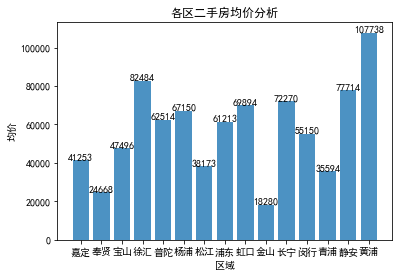

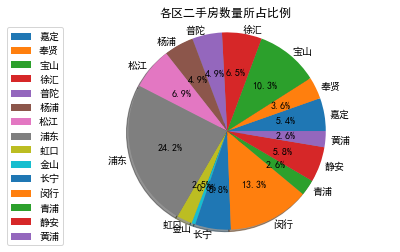

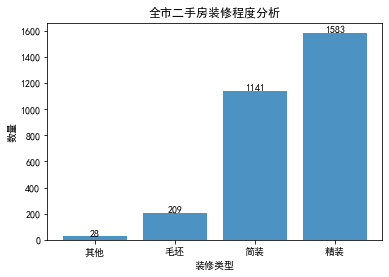

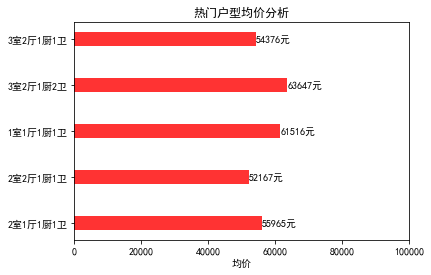

           户型  建筑面积
0  3室2厅1厨1卫    130.17
1  2室1厅1厨1卫     61.92
2  2室1厅1厨1卫     60.52
3  2室2厅1厨1卫     91.94
4  1室1厅1厨1卫     62.81
    室   厅   厨   卫
0  3.0  2.0  1.0  1.0
1  2.0  1.0  1.0  1.0
2  2.0  1.0  1.0  1.0
3  2.0  2.0  1.0  1.0
4  1.0  1.0  1.0  1.0
    总价  建筑面积   室   厅   厨   卫
0  798.0    130.17  3.0  2.0  1.0  1.0
1  435.0     61.92  2.0  1.0  1.0  1.0
2  680.0     60.52  2.0  1.0  1.0  1.0
3  750.0     91.94  2.0  2.0  1.0  1.0
4  276.0     62.81  1.0  1.0  1.0  1.0
真实值与预测值分别为：
        总价      y_pred
0     798.0  687.867330
1     435.0  321.249299
2     680.0  311.023768
3     750.0  467.639156
4     276.0  386.751702
...     ...         ...
2941  175.0  811.774770
2942  398.0  348.287960
2943  242.0  359.043441
2944    NaN  511.736350
2945    NaN  877.072095

[2946 rows x 2 columns]


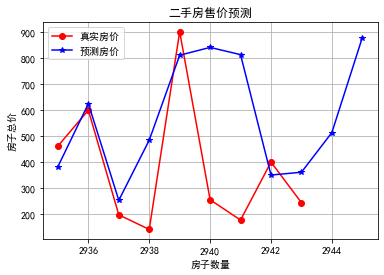

SystemExit: 0

E:\Anaconda\envs\TF2.1\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
from PyQt5.QtWidgets import QMainWindow, QApplication
 # 导入主窗体文件中的ui类
import sys                   # 导入系统模块
               # 导入自定义绘图模块
# 主窗体初始化类
plt.rcParams['font.sans-serif']=['SimHei'] 
class Main(QMainWindow, Ui_MainWindow):
    def __init__(self):
        super(Main, self).__init__()
        self.setupUi(self)

    # 显示各区二手房均价分析图
    def show_average_price(self):
        region, average_price= get_average_price()  # 获取房子区域与均价
        average_price_bar(region,average_price,'各区二手房均价分析')

    # 显示各区二手房数量所占比例
    def show_house_number(self):
        region, percentage = get_house_number()    # 获取房子区域与数量百分比
        pie_chart(percentage,region,'各区二手房数量所占比例') # 显示图表

    # 显示全市二手房装修程度分析
    def show_renovation(self):
        type, number = get_renovation()             # 获取全市房子装修程度
        renovation_bar(type,number,'全市二手房装修程度分析')       # 显示图表

    # 显示热门户型均价分析图
    def show_type(self):
        type, price = get_house_type()           # 获取全市二手房热门户型均价
        bar(price,type,'热门户型均价分析')

    # 显示二手房售价预测折线图
    def show_total_price(self):
        true_price,forecast_price = get_price_forecast()         # 获取预测房价
        broken_line(true_price,forecast_price,'二手房售价预测')             # 绘制及显示图表



if __name__ == "__main__":
    app = QApplication(sys.argv)
    # 主窗体对象
    main = Main()
    # 显示各区二手房均价分析图，按钮事件
    main.btn_1.triggered.connect(main.show_average_price)
    # 显示各区二手房数量所占比例图，按钮事件
    main.btn_2.triggered.connect(main.show_house_number)
    # 显示全市二手房装修程度分析图，按钮事件
    main.btn_3.triggered.connect(main.show_renovation)
    # 显示热门户型均价分析图，按钮事件
    main.btn_4.triggered.connect(main.show_type)
    # 显示全市二手房户售价预测图，按钮事件
    main.btn_5.triggered.connect(main.show_total_price)
    # 显示主窗体
    main.show()
    sys.exit(app.exec_())  # 当窗口创建完成，需要结束主循环过程